
# Connect Intensive - Machine Learning Nanodegree
# Lesson 01: An intro to Statistical Analysis using `pandas`

## Objectives
  - Practice running python from within a [Jupyter Notebook](http://jupyter.org/) (FKA IPython Notebook).
  - Become familiar with importing useful modules and packages, *e.g.* `pandas`, `numpy`, `matplotlib.pyplot`.
  - Learn about the [`pandas` data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#), including the `Series` and `DataFrame` objects.
  - Create a `DataFrame` object from data in a comma-separated variable (csv) file using [`pandas.read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
  - [Index and select data](http://pandas.pydata.org/pandas-docs/stable/indexing.html) from `Series` and `DataFrame` objects using `loc` and `iloc`
  - Compute descriptive statistics on a `Series` or `DataFrame`, including the [`mean`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html), the [`median`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html), and the [`min`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) & [`max`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - Explore a public data set found on [Kaggle](https://www.kaggle.com/)
  - Conduct some exploratory data analysis, and visualize trends in data using `matplotlib`
  
## Prerequisites
  - You should be able to run Lesson 00: Hello Jupyter Notebook!
  

## Welcome!
Hello astute young machine learnist, I'm glad you're here to learn more about statistical analysis! One of the major skills you can bring to the table as a machine learnist is the ability to explore and understand a data set. The library **`pandas`** is a Python package developed by Wes McKinney that machine learnists use to quickly and efficiently navigate data sets. From [the pandas documentation](http://pandas.pydata.org/pandas-docs/stable/index.html):

> "**`pandas`** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive."

Fun fact: the name "`pandas`" derives from **pan**el **da**ta, a term for multi-dimensional data sets! [(source)](http://www.dlr.de/sc/Portaldata/15/Resources/dokumente/pyhpc2011/submissions/pyhpc2011_submission_9.pdf)

## There's plenty to learn!
Depending on your background, a lot of the information and code in this Jupyter Notebook may be new to you. But don't worry, lots of documentation and references have been hyperlinked for you. Feel free to click on any of the hyperlinks to learn more -- the links should open within a new tab, so you won't lose your progress in the Jupyter Notebook. If you're still feeling uncertain about a topic, often the best place to start is a quick web search. For example, if Python is throwing me an error I've never seen before, I'll often copy and paste the error right into a Google search and see what comes up!

## First things first: Import statements
In Jupyter Notebooks, one of the first things we want to do is import useful modules and packages that will provide more functionality to our code. For example, we will want to import `pandas` so that we can manipulate data using the `DataFrame` object. We also want to have our Jupyter Notebook create figures and plots directly within the notebook. To do this, we use the [magic function](http://ipython.readthedocs.io/en/stable/interactive/tutorial.html#magics-explained) `%matplotlib inline`. For more information on plotting within the IPython kernel, [check this out](http://ipython.readthedocs.io/en/stable/interactive/plotting.html)!

**Run** the cell below (**click** on the cell to highlight it, then press **shift + enter** or **shift + return** to run it) to import modules and libraries for this Jupyter Notebook

In [1]:
%matplotlib inline
try:
    import numpy as np
    print("Successfully imported numpy! (Version {})".format(np.version.version))
except ImportError:
    print("Could not import numpy!")

    
try:
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore");
        import matplotlib
        import matplotlib.pyplot as plt
    plt.style.use('ggplot')
    print("Successfully imported matplotlib.pyplot! (Version {})".format(matplotlib.__version__))
except ImportError:
    print("Could not import matplotlib.pyplot!")

    
try:
    import pandas as pd
    print("Successfully imported pandas! (Version {})".format(pd.__version__))
    pd.options.display.max_rows = 10
except ImportError:
    print("Could not import pandas!")

    
try:
    from IPython.display import display
    print("Successfully imported display from IPython.display!")
except ImportError:
    print("Could not import display from IPython.display")

    
try:
    from zipfile import ZipFile
    print("Successfully imported ZipFile from zipfile!")
except ImportError:
    print("Could not import ZipFile from zipfile")
    
try:
    import os.path
    print("Successfully imported os.path!")
except ImportError:
    print("Could not import os.path")

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Successfully imported numpy! (Version 1.11.1)
Successfully imported matplotlib.pyplot! (Version 1.5.3)
Successfully imported pandas! (Version 0.18.1)
Successfully imported display from IPython.display!
Successfully imported ZipFile from zipfile!
Successfully imported os.path!


## Extracting from a ZIP archive
Let's create our first DataFrame using pandas! You can learn more about the DataFrame object from [the pandas documentation on DataFrames](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). The data set that we will play around with comes from [Kaggle datasets](https://www.kaggle.com/datasets). The user Eric Grinstein crawled the [ign game review page]() for video game review data from the last 20 years, and put the [video game data on Kaggle](https://www.kaggle.com/egrinstein/20-years-of-games). The csv file `'ign.csv'` containing the data is zipped within the archive `'20-years-of-games.zip'`.

**Run** the cell below to extract the csv file from the ZIP archive using [the zipfile module](https://docs.python.org/2/library/zipfile.html).

In [2]:
# The dataset is compressed within the zip file in this directory called '20-years-of-games.zip'
zip_file_name = '20-years-of-games.zip'

# Create a ZipFile object using the zip file name
zf = ZipFile(file=zip_file_name)

# Within the zip file is a comma-separated values (csv) file containing the games data named 'ign.csv'
in_file_name = 'ign.csv'

# Extract the games data into the current directory from the zip file 
zf.extract(member=in_file_name)

# Close the ZipFile object -- we won't need it any more
zf.close()

# Print a success message if the csv file was extracted from the zip file
if os.path.isfile(in_file_name):
    print("The file {} has been extracted!".format(in_file_name))
else:
    print("Could not extract the file {}".format(in_file_name))

The file ign.csv has been extracted!


## Our first `DataFrame`!
Now that we've extracted the file `'ign.csv'` from the ZIP archive containing the video game review data, we can create a `DataFrame` object from the csv file. The first line of the csv file contains the **feature** or **attribute** names, while each subsequent line in the file describes one **instance** or **input** of the data.

**Run** the cell below to use `pd.read_csv` to read the csv into a `DataFrame` object that we will call `df`. Then, the first 5 lines of the `DataFrame` will be displayed using `df.head(5)`. For more information on these methods, the documentation for [`read_csv`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [`head`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) is a good place to start!

In [3]:
df = pd.read_csv(in_file_name)
display(df.head(5))

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


In [6]:
display(df.head())

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


## Removing non-useful features
Our `DataFrame` has a lot of information for each game: a text descriptor for the game's rating called `'score_phrase'`, the `'title'` of the game, the `'url'` of the game review, the `'platform'` or console, the `'score'` from the review, *etc*. However, the first column of the `DataFrame`, the column labeled `'Unnamed: 0'` appears to simply repeat the [index of the instance](http://pandas.pydata.org/pandas-docs/stable/indexing.html). We don't really need to keep `Unnamed: 0`, because we can get the same information using the code `df.index.values`. So let's delete the first column:

**Run** the cell below to delete the column `'Unnamed: 0'` from the `DataFrame` object `df`. Then, display the first few lines of the data frame to see what it looks like without `'Unnamed: 0'`

In [5]:
if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']
    print("Deleted the column 'Unnamed: 0' from df!")
else:
    print("The column 'Unnamed: 0' has already been deleted!")
display(df.head(5))

Deleted the column 'Unnamed: 0' from df!


,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


## Indexing `DataFrame` and `Series` objects
On the leftmost edge of the `DataFrame`, we can see the index. Each row (instance, input) in the `DataFrame` has an index. To access a specific row based on the index, we can use `loc` or `iloc`. Label-based indexing is done with `loc`, while integer-position based indexing is done with `iloc`. For example, looking above, we can see that the first row in the `DataFrame` contains the game LittleBigPlanet for PS Vita. Let's get the first row (index 0) using `loc`!

**Run** the cell below to get the first row of the `DataFrame` using `df.loc[0]`. What does the result look like?

In [7]:
df.loc[0]

score_phrase                                     Amazing
title                            LittleBigPlanet PS Vita
url               /games/littlebigplanet-vita/vita-98907
platform                                PlayStation Vita
score                                                  9
genre                                         Platformer
editors_choice                                         Y
release_year                                        2012
release_month                                          9
release_day                                           12
Name: 0, dtype: object

The result doesn't look like a DataFrame! That's because one-dimensional objects in `pandas` are `Series` objects. `Series` objects are displayed as columns, with the indices shown on the left and the values shown on the right. Below the `Series` object, we see the name of the `Series` object and the `dtype` or data type of the `Series` object. The `dtype` of a `Series` object is chosen to accomodate all data within the `Series`.

What if we don't want the entire first row of the DataFrame, but just the `score_phrase`?

**Run** the cell below to see one way to get the `score_phrase` from the first row:

In [8]:
df.loc[0,'score_phrase']

'Amazing'

`'Amazing'`, right? There are a lot of ways we can get that `score_phrase` from the first row of the `DataFrame`.

**Run** the cells below to see many other ways to get the same `score_phrase` from the first row of the `DataFrame`. Do you understand how each line works?

In [10]:
# iloc lets you refer to the cell with just numbers
df.iloc[0,0]

'Amazing'

In [11]:
df.loc[0].loc['score_phrase']

'Amazing'

In [12]:
df['score_phrase'][0]

'Amazing'

In [13]:
df.iloc[0].iloc[0]

'Amazing'

In [14]:
df['score_phrase'].loc[0]

'Amazing'

We can also get multiple rows from the `DataFrame` by doing `numpy`-like slicing: `df.iloc[lower:upper]` will take a slice of the `DataFrame` object from the lower bound `lower` up to (but not including) the upper bound `upper`. Be careful! We get different results by slicing the `DataFrame` with `loc` and with `iloc`.

When slicing a `DataFrame` using `iloc` (the *integer-based* position indexing) the lower bound is included, while the upper bound is excluded.

**Run** the cell below to get the first three rows of the `DataFrame` using `df.iloc[0:3]`

In [15]:
df.iloc[0:3]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12


The lower bound (0) is *included*, while the upper bound (3) is *excluded*.

However, when slicing a `DataFrame` using `loc` (the *label-based* indexing), the starting and upper bounds are **both** included!

**Run** the cell below to see what happens when we call `df.loc[0:3]`

In [16]:
df.loc[0:3]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11


Both the lower bound (0) and the upper bound (3) are *included* with *label-based* indexing.

# Exercises - Part 1
Now it's your turn to play with `pandas` to answer questions using the ign game review data set. If you're not sure how to do something, feel free to ask questions, read up the `pandas` documentation, or refer to the code examples above! For this section, the `pandas` documentation on [indexing and slicing](http://pandas.pydata.org/pandas-docs/stable/indexing.html) might be most useful.

## Question 1:
What is the `'title'` of the game in the row with index 144?

In [35]:
print df.loc[144]['title']
print df.iloc[144,1]

SunFlowers
SunFlowers


## Question 2:
What is the `'platform'` of the game in the row with index 2353?

In [20]:
df.loc[2353]['platform']

'Game Boy Color'

## Question 3:
What do rows 500 up to (but not including) row 505 look like? Were any of those games `'editors_choice'`? Were any of those games `'Awful'`?

In [21]:
df.loc[500:504]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
500,Amazing,NHL FaceOff,/games/nhl-faceoff/ps-555,PlayStation,9.0,Sports,N,1996,11,25
501,Great,NFL GameDay,/games/nfl-gameday/ps-553,PlayStation,8.0,Sports,N,1996,11,25
502,Awful,Kileak: The DNA Imperative,/games/kileak-the-dna-imperative/ps-718,PlayStation,3.0,Action,N,1996,11,25
503,Awful,Raven Project,/games/raven-project/ps-184,PlayStation,3.0,Action,N,1996,11,25
504,Okay,Silverload,/games/silverload/ps-585,PlayStation,6.0,Adventure,N,1996,11,25


In [38]:
'No' if any(df.iloc[500:505]['editors_choice']=='N') else 'Yes'

'No'

## Question 4:
What does `df.iloc[0:100:10]` return? How would you describe integer-based slicing when there are three numbers in the square brackets?

In [26]:
df.iloc[0:100:10]
# third number acts as a step

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
20,Good,JoJo's Bizarre Adventure HD,/games/jojos-bizarre-adventure/ps3-137896,PlayStation 3,7.0,Fighting,N,2012,9,3
30,Amazing,The Walking Dead: The Game -- Episode 3: Long ...,/games/the-walking-dead-season-1-episode-3/mac...,Macintosh,9.0,Adventure,Y,2012,8,28
40,Great,Rock Band Blitz,/games/rock-band-blitz/xbox-360-131273,Xbox 360,8.5,Music,Y,2012,8,27
50,Amazing,NBA 2K13,/games/nba-2k13/xbox-360-132080,Xbox 360,9.1,Sports,Y,2012,9,27
60,Amazing,NBA 2K13,/games/nba-2k13/ps3-132077,PlayStation 3,9.1,Sports,Y,2012,9,27
70,Okay,Edna & Harvey: Harvey's New Eyes,/games/edna-harvey-harveys-new-eyes/pc-145776,PC,6.0,Adventure,N,2012,10,26
80,Great,Anomaly: Warzone Earth,/games/anomaly-warzone-earth/ps3-138479,PlayStation 3,8.2,Action,N,2012,9,23
90,Good,Crazy Taxi,/games/crazy-taxi/iphone-144755,iPhone,7.1,"Racing, Action",N,2012,10,11


## Question 5:
What does `df.iloc[:8]` return? How would you describe integer-based slicing when no lower bound is specified?

In [28]:
df.iloc[:8] # starts at index 0

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11
6,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012,9,11
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11


## Question 6:
What does `df.iloc[-3:]` return? How would you describe integer-based slicing with a negative lower bound and no upper bound?

In [29]:
df.iloc[-3:] # last three rows

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
18622,Mediocre,Star Ocean: Integrity and Faithlessness,/games/star-ocean-5/ps4-20035681,PlayStation 4,5.8,RPG,N,2016,6,28
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28
18624,Masterpiece,Inside,/games/inside-playdead/pc-20055740,PC,10.0,Adventure,Y,2016,6,28


In [39]:
df.iloc[-1]

score_phrase                             Masterpiece
title                                         Inside
url               /games/inside-playdead/pc-20055740
platform                                          PC
score                                             10
genre                                      Adventure
editors_choice                                     Y
release_year                                    2016
release_month                                      6
release_day                                       28
Name: 18624, dtype: object

## How much data do we have?
So we have our `DataFrame` object and we're able to slice it using `loc` and `iloc`, but we might be wondering exactly how much data is in the dataset. We can call  `len(df)` method to count the number of rows in the `DataFrame` object.

**Run** the cell below to count the number of rows in the `DataFrame` object.

In [30]:
print("There are {} rows in the DataFrame".format(len(df)))

There are 18625 rows in the DataFrame


[The method `df.count()`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.count.html) gives you even more information than `len(df)`! For each feature (column) in the `DataFrame` object, `df.count()` will count up the number of non-NA/null values for that feature. This is useful to get an idea of how many missing values are in your `DataFrame`, if any.

**Run** the cell below to count the number of non-NA/null values for each feature using `df.count()`. Is there a feature with missing values?

In [31]:
display(df.count())

score_phrase      18625
title             18625
url               18625
platform          18625
score             18625
genre             18589
editors_choice    18625
release_year      18625
release_month     18625
release_day       18625
dtype: int64

## More about the `Series` and `DataFrame` objects
**Note:** This section assumes that you are familiar with basic data structures, in particular Python dictionaries. If you need to brush up on this aspect of Python, check out the [Python tutorial on data structures](https://docs.python.org/3/tutorial/datastructures.html)!

The `DataFrame` object is a two-dimensional labeled data structure. As we saw above, each row is labeled with an index and each column is labeled with a feature name. Recall that if we take a single row from the DataFrame, it becomes a `Series` object. Similarly, if we take a single column of the `DataFrame` object, we would get a `Series` object. Thus, we can think of the `DataFrame` as a Python dictionary. The key-value pairs for this dictionary are the feature names and the `Series` objects. You can retrieve a single `Series` object from a `DataFrame` the same way you would retrieve a value from a dictionary: `df['title']` would retrieve the column `'title'` from `df` as a `Series` object. Let's try it!

**Run** the cell below to print the first ten lines of the `Series` object containing the all of the game titles:

In [32]:
display(df['title'].head(10))

0                              LittleBigPlanet PS Vita
1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
5                            Total War Battles: Shogun
6                                  Double Dragon: Neon
7                                         Guild Wars 2
8                                  Double Dragon: Neon
9                            Total War Battles: Shogun
Name: title, dtype: object

We also see the `Name` and `dtype` (data type) of the `Series` object. It looks like `title` has a data type of `object` -- we'll learn more about that in a bit.

Suppose we don't just want the `title` from `df`. What if we want both the `title` and `score`? We can access more than one feature of a `DataFrame` object with a list of keys rather than a single key:

**Run** the cell below to print the first ten lines of just the `'title'` and `'score'` features of the `DataFrame`.

In [40]:
display(df[['title','score']].head(10))

,title,score
0,LittleBigPlanet PS Vita,9.0
1,LittleBigPlanet PS Vita -- Marvel Super Hero E...,9.0
2,Splice: Tree of Life,8.5
3,NHL 13,8.5
4,NHL 13,8.5
5,Total War Battles: Shogun,7.0
6,Double Dragon: Neon,3.0
7,Guild Wars 2,9.0
8,Double Dragon: Neon,3.0
9,Total War Battles: Shogun,7.0


We accessed two features from the `DataFrame` object, and got a new `DataFrame` object as a result! That's a neat feature of `pandas`: one-dimensional labeled data structures become `Series` objects, while two-dimensional labeled data structures remain as `DataFrame` objects!

## Categorical Data
A `DataFrame` often contains `Series` where the variable takes on one of a small, discrete set of values. Some examples include:

  - day of the week {Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday}
  - a person's blood type {A+, A-, B+, B-, AB+, AB-, O+, O-}
  - a movie's rating {G, PG, PG-13, R, NC-17}
  - number of stars for a review {zero, one, two, three, four}
  - *Can you think of other similar examples?*


The `'categorical'` data type allows pandas to efficiently store a `Series` object that encodes data like in the examples above. Some examples of using the `'categorical'` data type are:

  - it uses less memory than the `'object'` data type, as long as the number of categories is *much less than* the length of the `Series`
  - it can be sorted on *logical* order (e.g. zero, one, two, three, four) rather than *lexical* or alphabetical order (e.g. four, one, three, two, zero)
  - other statistical methods are well-suited to categorical variables.
  
The [pandas documentation on categorical data](http://pandas.pydata.org/pandas-docs/stable/categorical.html#) has a lot more information, so feel free to explore more!

**Run** the cell below to compare memory usage when a `Series` object has relatively few vs. relatively many categories.

In [41]:
# Comparison of memory usage when the number of categories is SMALL:
print('df[\'genre\'] has {} distinct categories among {} values'.format(
        len(df['genre'].astype('category').cat.categories), len(df['genre'])))
print('df[\'genre\'] takes up {:6d} bytes of memory as an \'object\''.format(df['genre'].astype('object').nbytes))
print('df[\'genre\'] takes up {:6d} bytes of memory as a  \'category\'\n'.format(df['genre'].astype('category').nbytes))

# Comparison of memory usage when the number of categories is LARGE:
print('df[\'url\'] has {} distinct categories among {} values'.format(
        len(df['url'].astype('category').cat.categories), len(df['url'])))
print('df[\'url\'] takes up {:6d} bytes of memory as an \'object\''.format(df['url'].astype('object').nbytes))
print('df[\'url\'] takes up {:6d} bytes of memory as a  \'category\'\n'.format(df['url'].astype('category').nbytes))

df['genre'] has 112 distinct categories among 18625 values
df['genre'] takes up 149000 bytes of memory as an 'object'
df['genre'] takes up  19521 bytes of memory as a  'category'

df['url'] has 18577 distinct categories among 18625 values
df['url'] takes up 149000 bytes of memory as an 'object'
df['url'] takes up 185866 bytes of memory as a  'category'



So it looks like we only get the memory advantage of the `'category'` dtype over the `'object'` dtype for features with a relatively small amount of distinct categories. From our data set, it looks like the features `'score_phrase'`, `'platform'`, `'genre'`, and `'editors_choice'` are good candidates to convert from the `'object'` dtype to the `'category'` dtype.

**Run** the cell below to perform these dtype conversions, and then check to see if they converted correctly by printing `df.dtypes`:

In [42]:
df['genre'] = df['genre'].astype('category')
df['platform'] = df['platform'].astype('category')
df['score_phrase'] = df['score_phrase'].astype('category')
df['editors_choice'] = df['editors_choice'].astype('category')
print(df.dtypes)

score_phrase      category
title               object
url                 object
platform          category
score              float64
genre             category
editors_choice    category
release_year         int64
release_month        int64
release_day          int64
dtype: object


## Descriptive statistics on a `Series` object

Now that we know a bit more about the `Series` and `DataFrame` objects in `pandas`, let's start to explore the utility to keeping our data within these structures. The main quantitative feature in our data set is the `'score'` column. Let's do some descriptive statistics on that feature!

### Computing the mean

The mean or average is one measure of central tendency for a data set. The mean of a set of values is the sum of all values, divided by the number of values. We can compute the mean of the `Series` object `df['score']` using [the `sum()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html) to add up all the scores, and then dividing by the length of the `Series` object

**Run** the cell below to store the `Series` object `df['score']` into the variable `scores`, and then compute the mean.

In [43]:
scores = df['score']
print("The mean of the scores is {:.2f}".format(scores.sum() / len(scores)))

The mean of the scores is 6.95


Computing the mean was pretty easy, but there's an even simpler way! We can use [the `mean()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html) to compute the same thing!

**Run** the cell below to compute the mean of `scores` using the `mean()` method. Do we find the same result?

In [44]:
print("The mean of the scores is {:.2f}".format(scores.mean()))

The mean of the scores is 6.95


In [45]:
scores.median()

7.3

### Computing the median
The median is another measure of central tendency for a data set. When the data is arranged from smallest to largest, the median is the value right in the middle of the ordered data set. With an *odd* number of values in the data set $(2n+1)$, one value will be right in the middle, with $n$ values above it and $n$ values below it. With an *even* number of values in the data set $(2n)$, *two* values will be in the middle, with $n-1$ values above them and $n-1$ values below them: in this case, the median is actually the average of the two values right in the middle.

**Run** the cell below to compute the median by sorting `scores` in ascending order with the method [sort_values()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html#pandas.Series.sort_values) and then finding the value(s) right in the middle of the data set with [the iloc indexer](http://pandas.pydata.org/pandas-docs/version/0.17.1/generated/pandas.DataFrame.iloc.html).

In [46]:
scores = scores.sort_values(ascending=True)
n = len(scores)
if n % 2 == 1:
    median = scores.iloc[(n-1)//2]
else:
    median = (scores.iloc[n//2 - 1] + scores.iloc[n//2]) / 2.0
print("The median of the scores is {:.2f}".format(median))

The median of the scores is 7.30


That was a little more work than computing the mean, but we can be even more efficient! We can use [the `median()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html) to compute the same thing!

**Run** the cell below to compute the median of scores using the `median()` method. Do we find the same result?

In [47]:
print("The median of the scores is {:.2f}".format(scores.median()))

The median of the scores is 7.30


### Finding the maximum and minimum values
The maximum and the minimum values within a data set give us an idea of the range for that feature. Because we sorted `scores` in an eariler cell, the smallest (minimum) value within `scores` is at the start of the `Series` object, while the largest (maximum) value within `scores` is at the end of the `Series` object. Recall that the indexing convention in Python starts with 0 as the first index, and we can use the index -1 to retrieve the last item.

**Run** the cell below to print the minimum and maximum values from the sorted `scores` object.

In [48]:
print("The minimum and maximum scores are {:.1f} and {:.1f}, respectively".format(scores.iloc[0],scores.iloc[-1]))

The minimum and maximum scores are 0.5 and 10.0, respectively


We can also find the minimum and maximum values using [the `min()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html) and [the `max()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html), which don't require the `Series` object to be sorted.

**Run** the cell below to print the minimum and maximum values using the `min()` and `max()` methods. Do we find the same results?

In [49]:
print("The minimum and maximum scores are {:.1f} and {:.1f}, respectively".format(scores.min(),scores.max()))

The minimum and maximum scores are 0.5 and 10.0, respectively


## Selecting instances
We have lots of video game data, but we might not want to average all the scores together. We may want to select certain instances of the `DataFrame` before processing the data. To select certain instances, we can use [Boolean indexing](http://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing).

Before we get into Boolean indexing, we should see what happens when we compute a logical expression using a `Series` object. For example, let's see what happens when we check whether the `'editors_choice'` feature is equal to `'Y'`.

**Run** the cell below to compute the logical expression `df['editors_choice'] == 'Y'`. What is the result?

In [50]:
df['editors_choice'] == 'Y'

0         True
1         True
2        False
3        False
4        False
         ...  
18620    False
18621     True
18622    False
18623     True
18624     True
Name: editors_choice, dtype: bool

The logical expression above returns a `Series` object of dtype `bool`, with a value of `True` at the indices where `df['editors_choice']` is equal to `'Y'`, and `False` at the indices where `df['editors_choice']` is equal to `'N'`. 

**Run** the cell below to see what happens when we index a `DataFrame` object using this `Series` object.

In [51]:
df[df['editors_choice'] == 'Y']

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7
...,...,...,...,...,...,...,...,...,...,...
18615,Amazing,Zero Time Dilemma,/games/zero-time-dilemma/vita-20039757,PlayStation Vita,9.2,Adventure,Y,2016,6,29
18618,Amazing,Starbound,/games/starbound-2016/pc-128879,PC,9.1,Action,Y,2016,7,28
18621,Amazing,LEGO Star Wars: The Force Awakens,/games/lego-star-wars-the-force-awakens/ps4-20...,PlayStation 4,9.0,"Action, Adventure",Y,2016,6,29
18623,Masterpiece,Inside,/games/inside-playdead/xbox-one-121435,Xbox One,10.0,Adventure,Y,2016,6,28


We see what Boolean Indexing does -- it returns a DataFrame keeping only the rows where the logical expression was `True`. So we are able to easily select instances using a logical expression. We can use other methods to return `Series` objects of dtype `bool`. For example, we will use [the method `Series.str.contains()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) below to return all games that contain the string `'Mario'` in their title.

**Run** the cell below to select only the instances where the title contains the string `'Mario'` and display the first few `'Mario'` games.

In [52]:
mario_df = df[df['title'].str.contains('Mario')]
display(mario_df.head(5))

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
239,Great,Paper Mario: Sticker Star,/games/paper-mario-3ds/3ds-77808,Nintendo 3DS,8.3,RPG,N,2012,11,6
292,Amazing,New Super Mario Bros. U,/games/new-super-mario-bros-u/wii-u-135584,Wii U,9.1,Platformer,Y,2012,11,15
514,Amazing,Super Mario 64,/games/super-mario-64/n64-606,Nintendo 64,9.8,Platformer,Y,1996,9,25
525,Great,Mario Kart 64,/games/mario-kart/n64-502,Nintendo 64,8.1,"Racing, Action",Y,1997,2,20
1083,Good,Mario Party,/games/mario-party/n64-10397,Nintendo 64,7.9,Party,N,1999,2,11


Now that we've selected the instances where the `title` feature contains the `'Mario'` string, we can check to see if Mario games get higher scores from ign than the entire population of reviewed games.

**Run** the block of code below to display the mean ign review score for Mario games and compare it to the overall mean. 

In [53]:
print("The mean score is {:.2f} for Mario games, compared to the mean score {:.2f} for all reviewed games.".format(
    mario_df['score'].mean(), df['score'].mean()))

The mean score is 7.86 for Mario games, compared to the mean score 6.95 for all reviewed games.


We can also check the average score for games released in the last year... are we living in a golden age of gaming?

**Run** the block of code below to display the mean ign review score for games with `release_year` of 2016.

In [54]:
df_2016 = df[df['release_year']==2016]
print("The mean score of the {} games released in 2016 is {:.2f}.".format(len(df_2016),df_2016['score'].mean()))

The mean score of the 226 games released in 2016 is 7.57.


We can use [the `isin()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html) to see if the value of a feature is equal to any of the values within a list. This is useful if we want to pick items that fall within a category that is not necessarily numerical or lexical. For example, if we want to consider ign's reviews of mobile gaming, we might want to select only the instances from `df` where the `'platform'` feature is either `'Android'`, `'iPhone'`, or `'Windows Phone'`.

**Run** the block of code below to display the mean score for mobile games, where the `'platform'` is either `'Android'`, `'iPhone'`, or `'Windows Phone'`.

In [55]:
mobile_df = df[df['platform'].isin(['Android', 'iPhone', 'Windows Phone'])]
print("The mean score of {} mobile games is {:.2f}.".format(len(mobile_df),mobile_df['score'].mean()))

The mean score of 895 mobile games is 7.29.


## Describing and grouping
Before you try to solve some data problems on your own, there are a few other `pandas` techniques that will help you with your initial data exploration. The first is [the `describe()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html), that provides a descriptive summary of all numerical features within a `DataFrame` object.

**Run** the cell below to see what happens when you call `df.describe()`

In [56]:
display(df.describe())

,score,release_year,release_month,release_day
count,18625.000000,18625.000000,18625.00000,18625.000000
mean,6.950459,2006.515329,7.13847,15.603866
std,1.711736,4.587529,3.47671,8.690128
min,0.500000,1970.000000,1.00000,1.000000
25%,6.000000,2003.000000,4.00000,8.000000
50%,7.300000,2007.000000,8.00000,16.000000
75%,8.200000,2010.000000,10.00000,23.000000
max,10.000000,2016.000000,12.00000,31.000000


We see that `describe()` returns the count, the mean, the standard deviation, the minimum, the 25th, 50th, and 75th percentiles, and the maximum for features with numeric dtypes. Pretty handy!

The last thing I want to cover is [the `groupby()` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). We can combine the `groupby()` method with descriptive statistics methods, such as `min()`, `max()`, `mean()`, and `median()` to apply the function to each groups. For example, let's use `groupby()` to see the mean for each `platform`.

**Run** the code below to try your first `groupby()` command!

In [57]:
df.groupby('platform')['score'].mean()

platform
Android             7.546154
Arcade              6.036364
Atari 2600          5.900000
Atari 5200          8.000000
Commodore 64/128    6.416667
                      ...   
Xbox 360            7.105334
Xbox One            7.655769
iPad                7.672727
iPhone              7.288005
iPod                6.964706
Name: score, dtype: float64

In [60]:
# just doing a groupby doesn't return anything useful, you need to supply a summary statistic
print(df.groupby('platform'))

Pretty awesome, huh! With one line of code, we are able to compute the mean review score for each platform. Even more awesome is that we can use that result to pick out the results for specific platforms, and we can also plot the results really efficiently by just putting `.plot()` at the end!

**Run** the cell below to use `groupby()` to plot the results for only a few specific consoles:

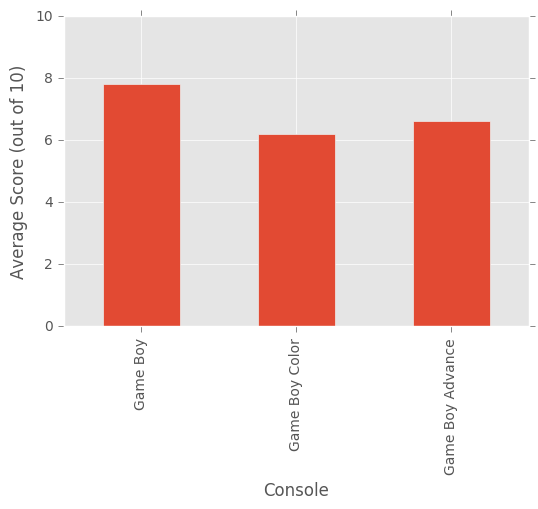

In [66]:
consoles = ['Game Boy','Game Boy Color','Game Boy Advance']
# need %matplotlib inline to have it display the plot in the notebook
ax = df.groupby('platform')['score'].mean()[consoles].plot(kind="bar")
xlabel = ax.set_xlabel("Console")
ylabel = ax.set_ylabel("Average Score (out of 10)")
ylim = ax.set_ylim([0,10])

I hope you're now appreciating how powerful `pandas` is as a tool for exploratory data analysis. Let's do one more advanced example of plotting using `groupby()` where we group by two features:

**Run** the cell below to generate a plot of the average release score for games from each year, for games with and without the editor's choice label

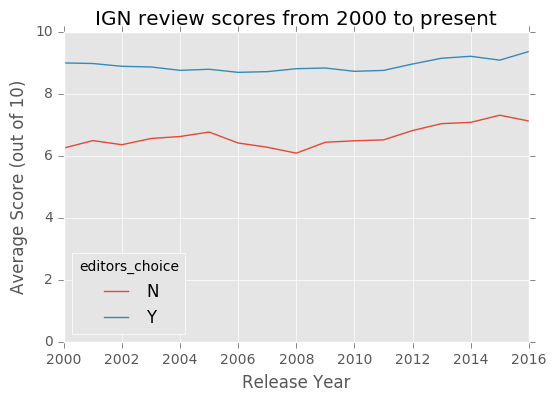

In [67]:
ax = df\
    [df['release_year']>=2000]\
    .groupby(['editors_choice','release_year'])\
    ['score']\
    .mean()\
    .unstack('editors_choice')\
    .plot(title="IGN review scores from 2000 to present")
xlabel = ax.set_xlabel("Release Year")
ylabel = ax.set_ylabel("Average Score (out of 10)")
ylim = ax.set_ylim([0,10])

There's a lot going on in the cell above. Note that the first seven lines are a single command broken over several lines with slashes for easier comprehension. Let's break it all down:
  - In line 1, we start with the data frame `df`. Eventually this long line of code will return a `matplotlib.axes.AxesSubplot` object, so we store the result into `ax`.
  - In line 2, we use boolean indexing to select only the instances with games released in the year 2000 or later.
  - In line 3, we use the `groupby()` method to group the data first by `'editors_choice'` and then by `'release_year'`.
  - In line 4, we keep only the `'score'` feature of the data frame.
  - In line 5, we compute our desired descriptive statistic: the mean(). Note that because we've grouped by `'editors_choice'`, and then by `'release_year'`, each feature has two indices. The outermost index (level 0) is `'editors_choice'` and the innermost index (level -1) is `'release_year'`. So we will have the mean of editors-choice games and the mean of non-editors-choice games for each year.
  - In line 6, [the method unstack('editors_choice')](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) pivots the `'editors_choice'` index, and each possible value of `'editors_choice'` becomes a column.
  - In line 7, we make a plot with one line for each column. The x-axis is the only remaining index, which is `'release_year'`
  - The last three lines use the `ax` object to set the labels and y-axis limits.

More helpful hints on visualization can be found [in the pandas documentation](http://pandas.pydata.org/pandas-docs/stable/visualization.html#).

Also, you may **run** the three cells below to make more sense of what the `unstack()` method is actually doing:

In [70]:
df\
    [df['release_year']>=2000]\
    .groupby(['editors_choice','release_year'])\
    ['score']\
    .mean()

editors_choice  release_year
N               2000            6.254784
                2001            6.495146
                2002            6.362571
                2003            6.562251
                2004            6.627187
                                  ...   
Y               2012            8.966190
                2013            9.151449
                2014            9.214433
                2015            9.090141
                2016            9.368889
Name: score, dtype: float64

In [68]:
# Here is the DataFrame unstacking index 0 (editors_choice)
df\
    [df['release_year']>=2000]\
    .groupby(['editors_choice','release_year'])\
    ['score']\
    .mean()\
    .unstack(0)

editors_choice,N,Y
release_year,,
2000,6.254784,9.000599
2001,6.495146,8.982081
2002,6.362571,8.891228
2003,6.562251,8.870412
2004,6.627187,8.760630
...,...,...
2012,6.819705,8.966190
2013,7.042294,9.151449
2014,7.082500,9.214433


In [69]:
# Here is the DataFrame unstacking index 1 (release_year)
df\
    [df['release_year']>=2000]\
    .groupby(['editors_choice','release_year'])\
    ['score']\
    .mean()\
    .unstack(1)

release_year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
editors_choice,,,,,,,,,,,,,,,,,
N,6.254784,6.495146,6.362571,6.562251,6.627187,6.769822,6.417867,6.281205,6.089597,6.441394,6.489113,6.517726,6.819705,7.042294,7.082500,7.313946,7.127072
Y,9.000599,8.982081,8.891228,8.870412,8.760630,8.796296,8.696407,8.719397,8.814286,8.836655,8.729259,8.758824,8.966190,9.151449,9.214433,9.090141,9.368889


In [71]:
# Here is the Series without unstacking either index. Note that each instance (row) has two indices.
df\
    [df['release_year']>=2000]\
    .groupby(['editors_choice','release_year'])\
    ['score']\
    .mean()

editors_choice  release_year
N               2000            6.254784
                2001            6.495146
                2002            6.362571
                2003            6.562251
                2004            6.627187
                                  ...   
Y               2012            8.966190
                2013            9.151449
                2014            9.214433
                2015            9.090141
                2016            9.368889
Name: score, dtype: float64

# Exercises - Part 2
Now it's your turn to play with `pandas` to answer questions using the ign game review data set. If you're not sure how to do something, feel free to ask questions, read up the `pandas` documentation, or refer to the code examples above!

## Question 1:
What is the mean IGN review score for games released in October (where the `release_month` is 10)?

In [75]:
df[df['release_month']==10]['score'].mean()

7.067142857142838

## Question 2:
How many games were reviewed by IGN that were released for the `'Genesis'` platform?

In [81]:
df[df['platform']=='Genesis'].count()

score_phrase      58
title             58
url               58
platform          58
score             58
genre             58
editors_choice    58
release_year      58
release_month     58
release_day       58
dtype: int64

## Question 3:
On average, does IGN rate games higher in the `'Platformer'` genre, or in the `'Action'` genre?

In [103]:
platform_mean = df[df['genre'].isin(['Platformer','Action'])][['genre','score']].groupby('genre').mean()
# remove rows that have NAN in the 'score' column
platform_mean[pd.notnull(platform_mean['score'])]

,score
genre,
Action,6.626679
Platformer,7.186513


## Question 4:
How many 'Mario' games have been reviewed by IGN? What about 'Kirby' games? Which games does IGN tend to review more highly?

In [114]:
mario_games_avg = df[df['title'].str.contains('Mario')]['score'].mean()
kirby_games_avg = df[df['title'].str.contains('Kirby')]['score'].mean()
print "Mario games avg = %f\nKirby games avg = %f" % (mario_games_avg,kirby_games_avg)

Mario games avg = 7.864912
Kirby games avg = 7.832000


## Question 5:
Make a bar plot with the number of games reviewed, grouped by `release_month`. Which `release_month` has had the most reviewed games? The fewest?

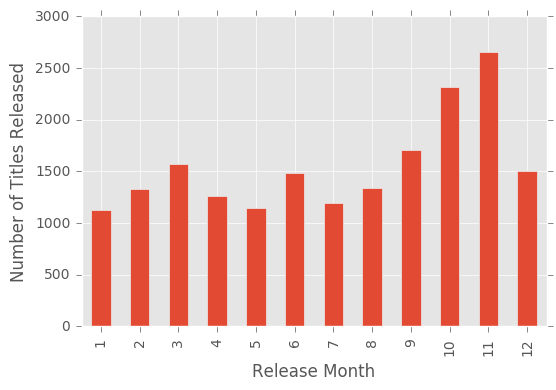

In [119]:
ax = df.groupby('release_month').count()['title'].plot(kind="bar")
xlabel = ax.set_xlabel("Release Month")
ylabel = ax.set_ylabel("Number of Titles Released")


## Question 6:
Now make a bar plot with the mean score, grouped by `release_month`. Which `release_month` has the highest-reviewed games? The lowest?

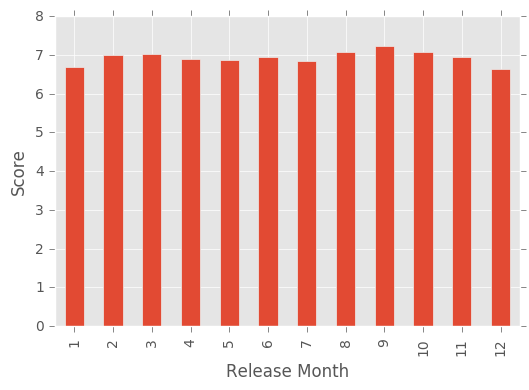

In [121]:
ax = df.groupby('release_month').mean()['score'].plot(kind="bar")
xlabel = ax.set_xlabel("Release Month")
ylabel = ax.set_ylabel("Score")


## Question 7:
Which `'score_phrase'` was the most commonly used by IGN in the year 2008? The least common?

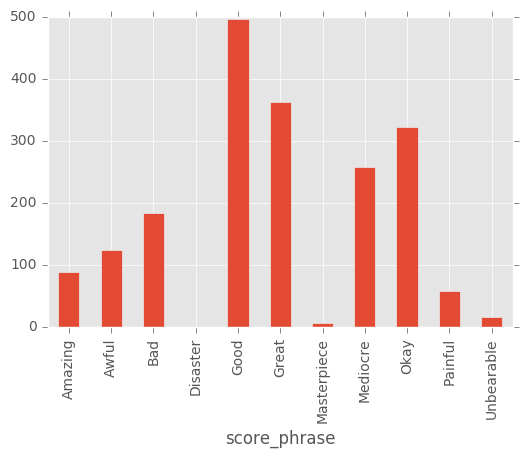

In [131]:
df[df['release_year'] == 2008].groupby('score_phrase').count()['title'].plot(kind='bar')

## Question 8:
Make a plot showing how the average scores for games in the genres `'Party'`, `'RPG'`, and `'Sports'` have changed from the year 2000 to the year 2010. How do the trends look for each genre? Does one genre appear to be consistently reviewed higher or lower than the other two? 

,release_year,genre,score
1854,2000,RPG,7.4
1855,2000,Sports,5.0
1864,2000,Sports,5.0
1865,2000,Sports,5.5
1868,2000,Sports,4.5
...,...,...,...
15310,2010,Party,7.0
15407,2010,RPG,6.5
15408,2010,RPG,9.0
15411,2010,Sports,8.0


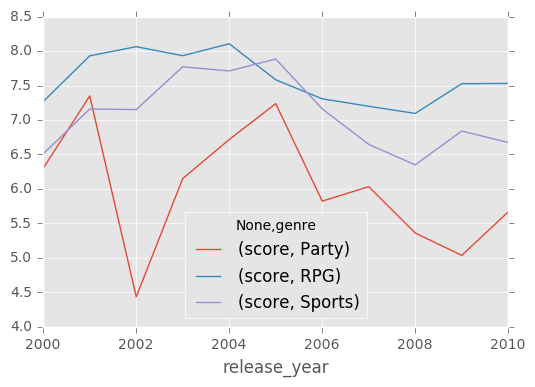

In [163]:
genres=['Party','RPG','Sports']
sub1 = df[df['release_year'].isin(range(2000,2011))]
sub2 = sub1[sub1['genre'].isin(genres)][['release_year','genre','score']]
display(sub2)
sub3 = sub2.groupby(['release_year','genre']).mean()
sub3[pd.notnull(sub3['score'])].unstack('genre').plot()
#display(sub3)
#sub3[pd.notnull(sub3['score'])]
#sub2.groupby('genre').mean()['genre'].plot(kind='bar')

